In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("customer_data.csv")

In [3]:
df.head()

,Annual_Income,Spending_Score
0,-5.772478,-4.818216
1,6.768246,-5.424570
2,5.796159,-6.239967
3,7.096022,-5.272612
4,-5.725561,-9.316889


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1499 entries, 0 to 1498
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Annual_Income   1499 non-null   float64
 1   Spending_Score  1499 non-null   float64
dtypes: float64(2)
memory usage: 23.6 KB


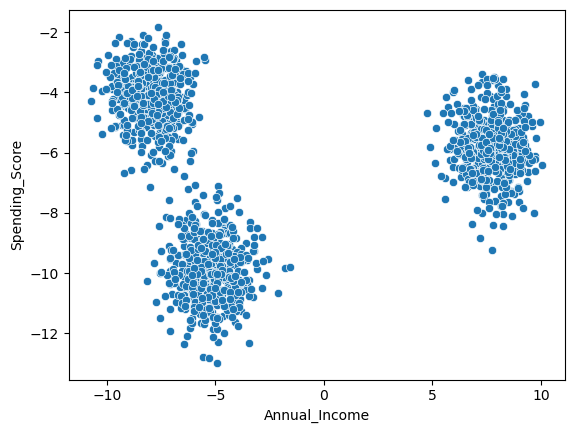

In [5]:
sns.scatterplot(data=df, x="Annual_Income", y="Spending_Score")
plt.show()

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test = train_test_split(df, test_size = 0.2, random_state=15) # %80 eğitim %20 test
# random_state=15 -> aynı veriyi aynı şekilde böler. Sonuçların tutarlılığını sağlar. Reproducible (sonuçlar tekrarlanabilir.)

In [8]:
X_train

,Annual_Income,Spending_Score
258,7.809992,-5.031123
195,7.769519,-6.059915
817,-8.529586,-4.853877
820,-5.765759,-9.822013
716,-7.932068,-4.882406
...,...,...
667,-6.734875,-5.107626
156,-8.236823,-3.127431
384,-7.744180,-3.563590
645,-6.151325,-9.263209


In [9]:
X_test

,Annual_Income,Spending_Score
513,-5.172436,-11.041683
906,-7.281623,-4.334985
1366,-7.933360,-4.679263
367,7.247201,-4.157474
1392,-5.963997,-9.834777
...,...,...
879,-4.747040,-9.904793
722,-4.886108,-10.754440
557,7.764069,-4.766483
1230,-5.160849,-10.713683


In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [13]:
from sklearn.cluster import KMeans

In [19]:
#elbow method
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

C:\Users\eceha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\eceha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\eceha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\eceha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [20]:
wcss

[196.92068784710156,
 68.44836482219306,
 11.697030239519933,
 9.602360836697933,
 7.88303298027517,
 6.088217241014236,
 5.539846826520842,
 4.969387397825232,
 4.551266006504081,
 4.058011517933727]

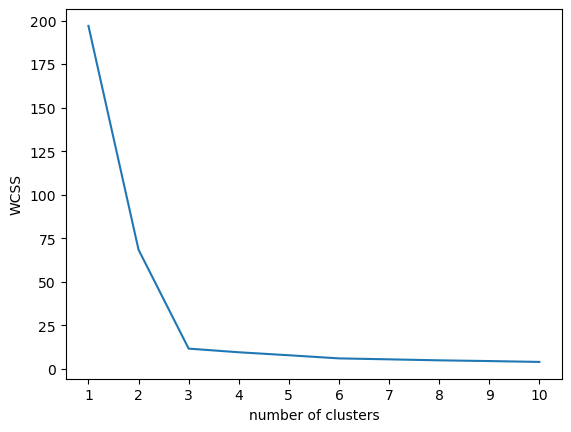

In [22]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
kmeans = KMeans(n_clusters=3)

In [24]:
kmeans.fit(X_train_scaled)

C:\Users\eceha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


KMeans(n_clusters=3)

In [25]:
y_pred = kmeans.predict(X_test_scaled)

In [27]:
pd.DataFrame(X_test_scaled, columns=X_test.columns)

,Annual_Income,Spending_Score
0,0.261104,0.170412
1,0.156427,0.811836
2,0.124082,0.778910
3,0.877477,0.828813
4,0.221819,0.285840
...,...,...
295,0.282216,0.279143
296,0.275314,0.197884
297,0.903129,0.770568
298,0.261679,0.201782


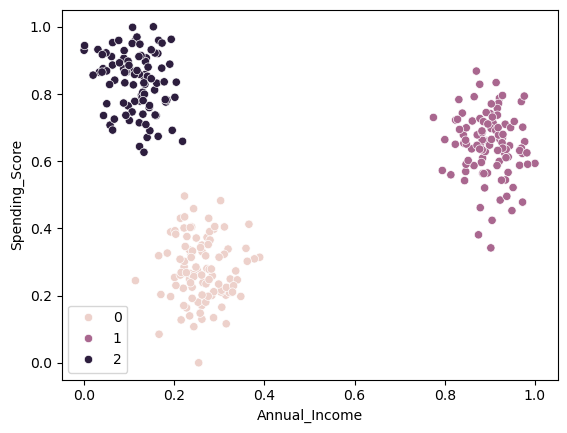

In [29]:
sns.scatterplot(data=pd.DataFrame(X_test_scaled, columns=X_test.columns),x="Annual_Income",y="Spending_Score", hue=y_pred)
plt.show()